# Introduction:



# The Metric:



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import scipy.stats as stats
%matplotlib inline

reports = pd.read_csv("police.csv")



num_reports = reports.groupby("INCIDENTNEIGHBORHOOD").nunique()



num_reports = num_reports.sort_values('PK', ascending=True)
std = num_reports["PK"].std()
mean = num_reports["PK"].mean()
print("std: ", std)
print("mean: ", mean)
print("mean: ", num_reports.shape)


<ipython-input-16-b12c2eef2944>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reports = pd.read_csv("police.csv")


std:  1269.4567703080754
mean:  977.1190476190476
mean:  (84, 12)


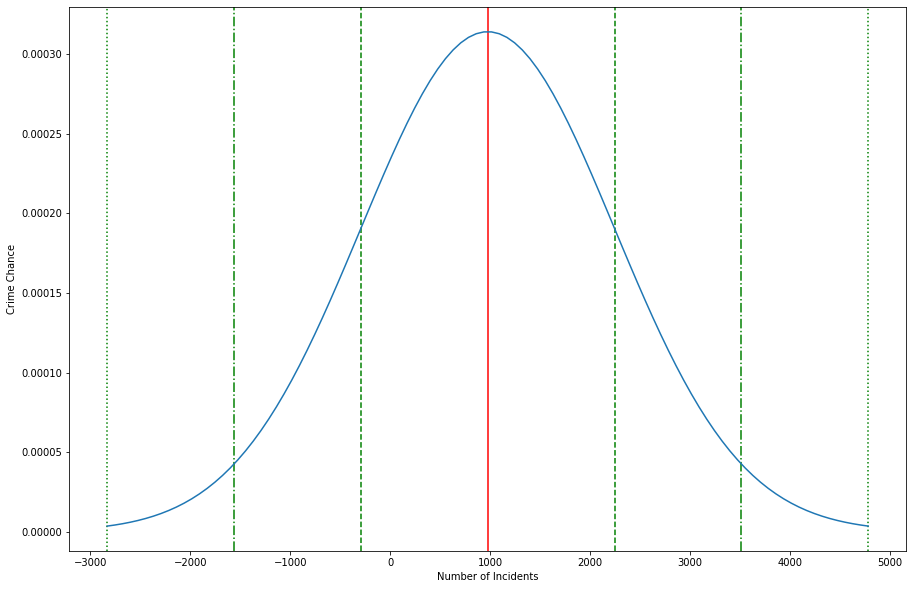

In [13]:
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.figure(figsize=(15,10))
plt.ylabel('Crime Chance')
plt.xlabel('Number of Incidents')
plt.axvline(mean, color='r', linestyle='solid')
plt.axvline((mean + std), color='g', linestyle='--')
plt.axvline((mean - std), color='g', linestyle='--')
plt.axvline((mean + 2*std), color='g', linestyle='-.')
plt.axvline((mean - 2*std), color='g', linestyle='-.')
plt.axvline((mean + 3*std), color='g', linestyle=':')
plt.axvline((mean - 3*std), color='g', linestyle=':')
plt.plot(x, stats.norm.pdf(x, mean, std))
plt.show()

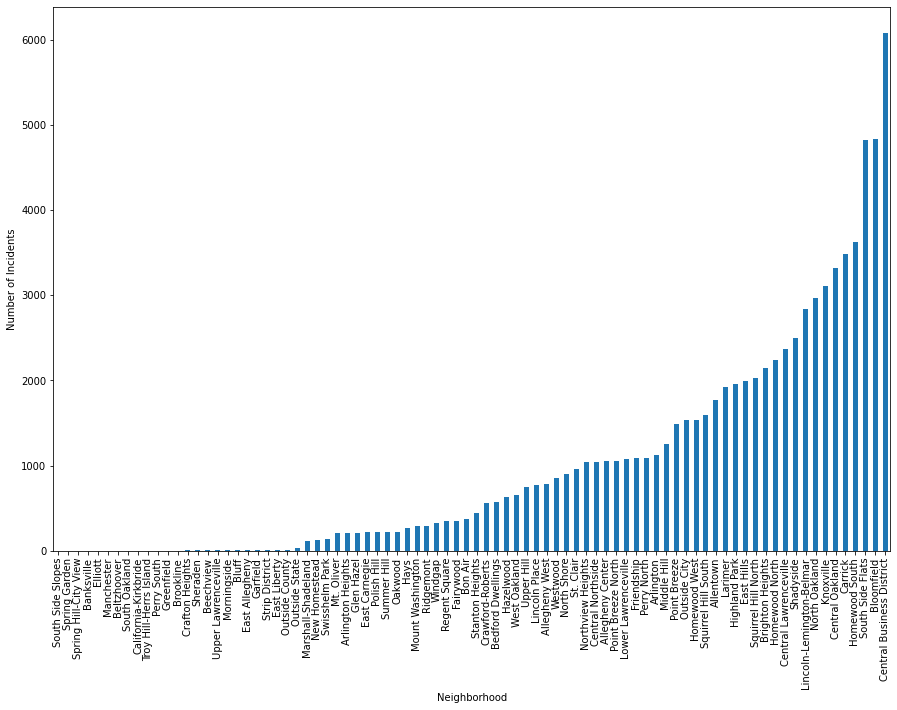

In [17]:
num_reports["PK"].plot.bar(figsize=(15,10))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.show()

# The Best Neighborhood:

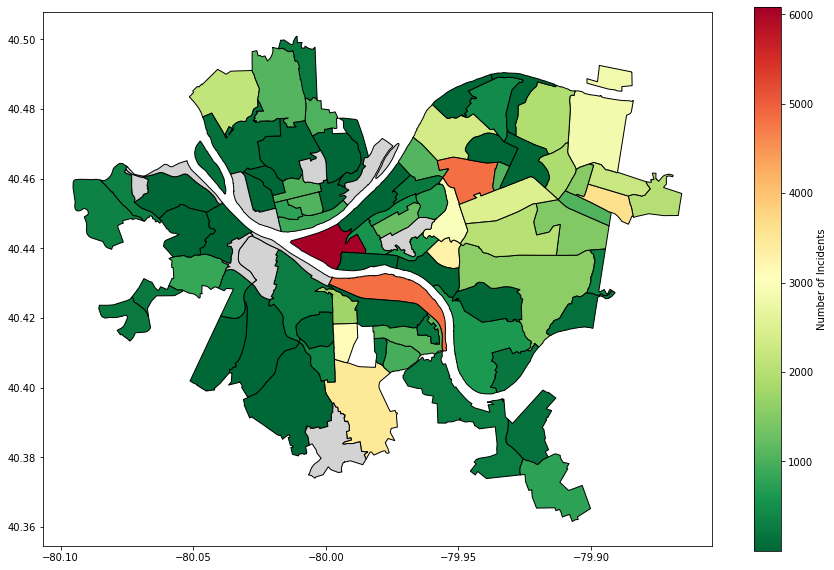

In [2]:
neighborhoods = geopandas.read_file("Pitt/Neighborhoods_.shp")


reports_map = neighborhoods.merge(num_reports["PK"], how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

reports_map[['hood','PK','geometry']]

reports_map.plot(column='PK', cmap=plt.cm.get_cmap('RdYlGn').reversed(), edgecolor="Black", legend=True, legend_kwds={'label': "Number of Incidents"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
